## 第三回：布局格式定方圆

In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

### 一、子图
#### 1.使用 plt.subplots 绘制均匀状态下的子图

- 返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列，不传入时默认值都为1

- figsize 参数可以指定整个画布的大小

- sharex 和 sharey 分别表示是否共享横轴和纵轴刻度

- tight_layout 函数可以调整子图的相对大小使字符不会重叠

- 接下来尝试创建多个子图,并且共享坐标轴

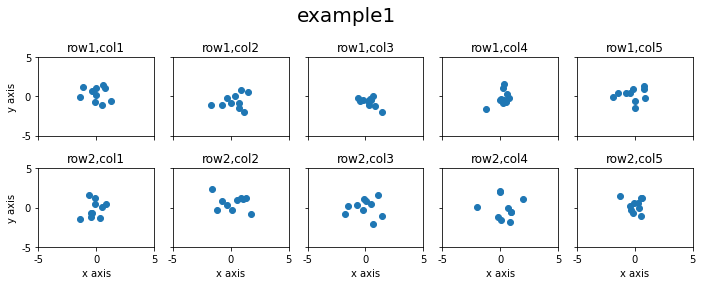

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('example1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('row%d,col%d'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('x axis')
        if j==0: axs[i][j].set_ylabel('y axis')
fig.tight_layout()

- `subplots`是基于OO模式的写法，显式创建一个或多个axes对象，然后在对应的子图对象上进行绘图操作。
- 还有种方式是使用`subplot`这样基于pyplot模式的写法，每次在指定位置新建一个子图，并且之后的绘图操作都会指向当前子图，本质上`subplot`也是`Figure.add_subplot`的一种封装。
- 在调用`subplot`时一般需要传入三位数字，分别代表总行数，总列数，当前子图的index

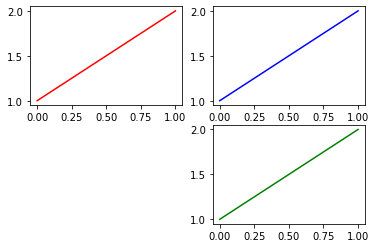

In [5]:
plt.figure()
# 子图1
plt.subplot(2,2,1) 
plt.plot([1,2], 'r')
# 子图2
plt.subplot(2,2,2)
plt.plot([1,2], 'b')
#子图3
plt.subplot(224)  # 当三位数都小于10时，可以省略中间的逗号，这行命令等价于plt.subplot(2,2,4) 
plt.plot([1,2], 'g');

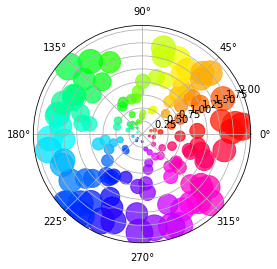

In [6]:
# 调用subplot,也可以通过projection方法创建极坐标系下的图表
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75);

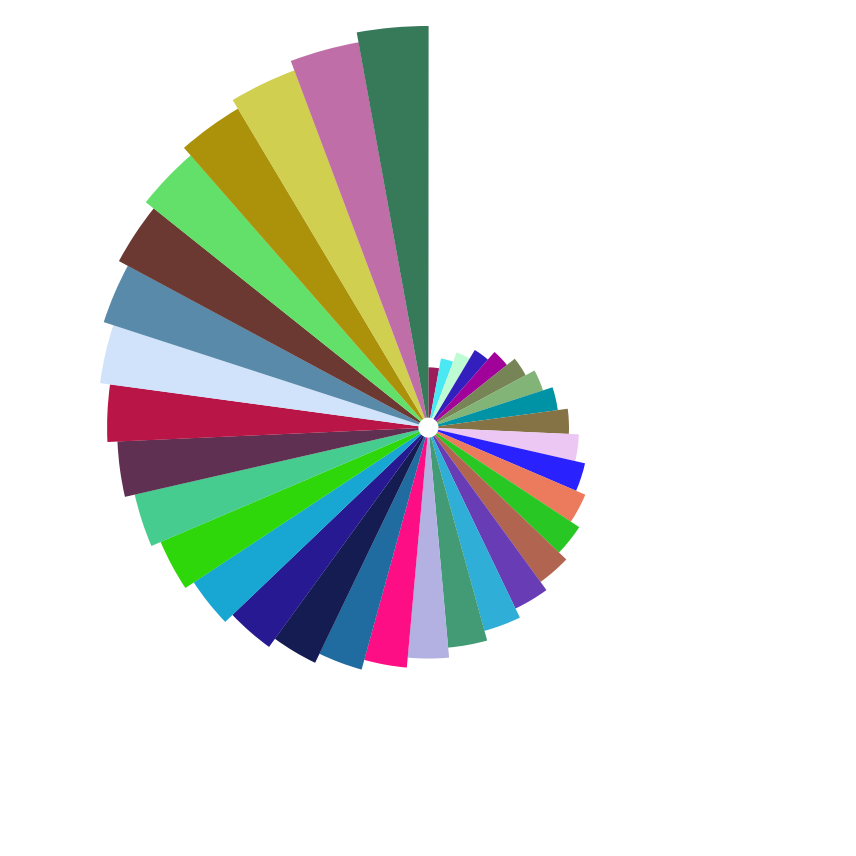

In [19]:
# 绘制南丁格尔玫瑰图

fig = plt.figure(figsize=(20,12))
ax = plt.subplot(projection="polar")
ax.set_theta_direction(-1)#正上方0度
ax.set_theta_zero_location("N")
#生成数据
r = np.arange(100,800,20)
theta = np.linspace(0,np.pi*2,len(r),endpoint=False)
#绘制玫瑰图
ax.bar(theta,r,\
    width=0.18,
    color=np.random.random((len(r),3)),
    align='edge',bottom=20)

plt.axis('off')#不显示坐标轴和grid
plt.tight_layout()#缩小外边距

#### 2.使用 GridSpec 绘制非均匀子图
- 所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

- 利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`
- 事实上通过切片就可以实现子图的合并而达到跨图的共能

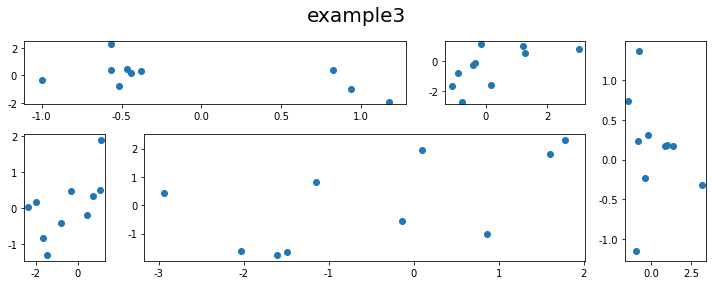

In [13]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('example3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

### 二、子图上的方法

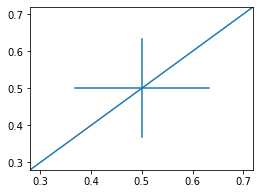

In [14]:
#绘制指定方向直线
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7]);

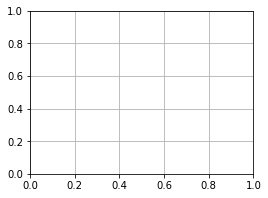

In [15]:
#添加灰色网格
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

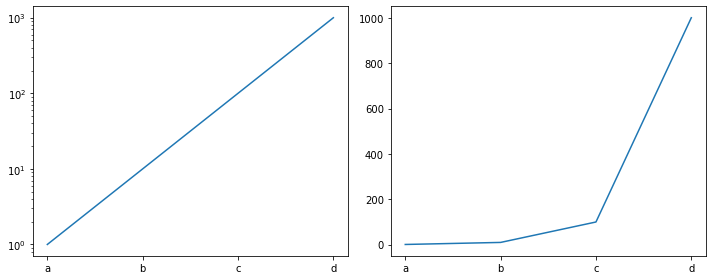

In [16]:
#设置坐标轴规度
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
    else:
        pass
fig.tight_layout()

### 思考题
1. 墨尔本1981年至1990年的每月温度情况
数据集来自github仓库下data/layout_ex1.csv
- 请利用数据，画出如下的图：

2. 画出数据的散点图和边际分布
- 用 np.random.randn(2, 150) 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

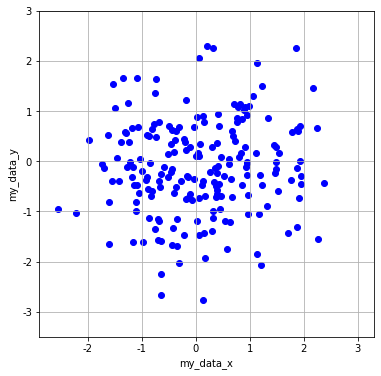

In [18]:
rn = np.random.RandomState(0)
x = rn.randn(2,200)#返回一个2*150的随机项矩阵

fig,ax = plt.subplots(figsize = (6,6))
ax.scatter(x[0],x[1],c = 'b')
ax.set_xlabel('my_data_x')
ax.set_ylabel('my_data_y')
ax.set_xlim(-2.9,3.3)
ax.set_ylim(-3.5,3)
ax.grid()
plt.show()